In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df=pd.read_csv('Data_eda.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,R Studio,Spark,AWS_yn,Excel_yn,Job_simp,seniority,job_state,desc_len,Num_comp,Man_Salary
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,0,0,1,data scientist,na,NM,2536,0,91
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,0,0,0,data scientist,na,MD,4783,0,112
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,0,1,0,1,data scientist,na,FL,3461,0,90
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,0,0,0,0,data scientist,na,WA,3883,3,97
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,0,0,0,1,data scientist,na,NY,2728,3,143


## Steps to be Followed while building Model:

1. Choose Relevent Columns.
2. Get Dummy Dates.
3. Train Test Split.
4. Multiple Linear Regression.
5. Lasso Regression.
6. Random Forest.
7. Tune Models GridSearchCV.
8. Test Ensembles.


# Choosing Relevent Columns:


In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'Job_simp', 'seniority', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

In [4]:
df_model = df[['Salary Estimate', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Num_comp', 'PerHour','Job Title', 'job_state','Same State','Age','Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Job_simp', 'seniority', 'desc_len']]
df_model.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,Num_comp,PerHour,Job Title,job_state,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,Job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,Data Scientist,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,Healthcare Data Scientist,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,Data Scientist,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,Data Scientist,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,Data Scientist,NY,1,25,1,0,0,1,data scientist,na,2728


# Get Dummy Dates

In [5]:

df_dum  = pd.get_dummies(df_model)
pd.set_option('display.max_rows',None)

In [6]:
df_dum.head()

,Salary Estimate,Rating,Num_comp,PerHour,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,...,Job_simp_analyst,Job_simp_data engineer,Job_simp_data scientist,Job_simp_director,Job_simp_manager,Job_simp_mle,Job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,50,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
1,87.5,3.4,0,0,0,39,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
2,85.0,4.8,0,0,1,13,1,1,0,1,...,False,False,True,False,False,False,False,False,True,False
3,76.5,3.8,3,0,1,58,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4,114.5,2.9,3,0,1,25,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False


In [7]:
df1 = pd.DataFrame(df)


In [8]:
# Function to map values to 1, 0, or keep them unchanged
df_int = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the resulting DataFrame
pd.set_option('display.max_rows',None)
df_int.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,R Studio,Spark,AWS_yn,Excel_yn,Job_simp,seniority,job_state,desc_len,Num_comp,Man_Salary
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,0,0,0,1,data scientist,na,NM,2536,0,91
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,0,0,0,0,data scientist,na,MD,4783,0,112
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,0,1,0,1,data scientist,na,FL,3461,0,90
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,0,0,0,0,data scientist,na,WA,3883,3,97
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,0,0,0,1,data scientist,na,NY,2728,3,143


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


# Multiple Linear Regression

In [16]:
!pip install statsmodels

In [17]:
# import statsmodels.api as sm

# X_sm = X = sm.add_constant(X)
# # np.asarray(df_int)
# # model = sm.OLS(y,X_sm,df_int.all())
# # model.fit().summary()


# import statsmodels.formula.api as smf

# # Load data
# # dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# # Fit regression model (using the natural log of one of the regressors)
# results = smf.ols(X_sm,y, data=df_int).fit()
# # 'Lottery ~ Literacy + np.log(Pop1831)',
# # Inspect the results
# print(results.summary())

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error')

array([-9.53127410e+07, -1.33396537e+08, -4.64010074e+08, -1.32257171e+09,
       -6.07378673e+08])

In [19]:
cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=3)

array([-1.74975325e+09, -1.07703187e+09, -2.12592019e+09])

In [20]:
# the above output is to skewed so by taking its mean we will be to read
np.mean(cross_val_score(lm,X_train,y_train, scoring='neg_mean_absolute_error', cv=2))

-30.455925794043694

# Lasso Regression

In [21]:
from sklearn.linear_model import Lasso
lm_l = Lasso()
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-21.096199872181035

<b> It means that the lasso Regression model or Algorithm is best from LinearRegresion according to our data</b>

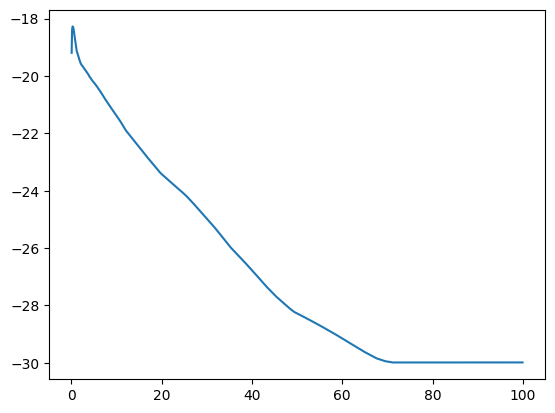

In [22]:
alpha = []
error = []

for i in range(1,1000):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train, y_train, scoring='neg_mean_absolute_error', cv=2)))

plt.plot(alpha,error)

## Checking how much we improve our model

In [23]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns= ['Alpha', 'error'])

# checking how much we improve the model 
df_err[df_err.error==max(df_err.error)]


,Alpha,error
2,0.3,-18.272763


### In Lasso Regression the error we record is:

In [24]:
np.mean(cross_val_score(lm_l, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-21.096199872181035

<br>

- <b>we can see that improve our from -21.09619987218103 to -18.272763 and that pretty awesome</b>

# Random Forest Model or Algorithm

- training the model.
- Calculating its error.
- Trying to minimize the error.

#### Training the Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#### Calculating the error of Random Forest Model

In [26]:
np.mean(cross_val_score(rf, X_train, y_train, scoring= 'neg_mean_absolute_error', cv=3))

-15.191870225093574

Its quit awesome that Random Forest Model is doing for on our data.

without Minimizing the error it performing better than the last algorithms that we apply on our data.

# Tunning by GridsearchCV

Lets understand how it works:
- we will give the parameters that we want in model.
- Based on those parameters it will analyse algorithm.
- We will select which one is best according to these analysis of GridSearchCV.



In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimaters': range(10,300,10), 'criterion':('mse','mae'), 'max_featurs':{'auto', 'sqrt', 'log2'}}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train,y_train)

TypeError: Parameter grid for parameter 'max_featurs' needs to be a list or a numpy array, but got {'log2', 'auto', 'sqrt'} (of type set) instead. Single values need to be wrapped in a list with one element.

In [29]:

# Assuming rf, X_train, and y_train are defined
# rf = RandomForestRegressor()  # You can replace this with your RandomForestRegressor model

parameters = {
    'n_estimators': range(10, 300, 10),
    'criterion': ['friedman_mse', 'mean_absolute_error'],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

C:\Users\Vampire\miniconda3\envs\ModelBuilding\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vampire\miniconda3\envs\ModelBuilding\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vampire\miniconda3\envs\ModelBuilding\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Vampire\miniconda3\envs\ModelBuilding\Lib\site-packages\sklearn\base.py", line 638, in _validate_para

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mean_absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')